# Data Filtering

## Titanic Dataset

In [43]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv("../data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
# checking the details of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
# checking the data types of the different fields/columns

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Checking missing values

In [47]:
# checking if each cell is Null or not.
# it is True if it is Null and it is False if it is not null.

df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
# True means 1 and False means 0
# if sum all the True values, it is basically the number of Null records
# the following command shows us how many missing values (Null) exist in the dataframe

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
# it describes the dataframe, reporting mean, std, min, max, etc.
# it only reports numerical columns

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Missing Records

In [50]:
# removing records with the missing values

df = df.dropna(subset=["Embarked"])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [51]:
df.shape

(889, 12)

In [52]:
# removing/dropping a column entirely

df.drop(columns=["Cabin"], inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### Replace with 0

In [ ]:
df_temp = df.copy()

df_temp.fillna(value={"Age": 0}, inplace=True)
df_temp.isna().sum()

In [ ]:
df_temp.describe()

### Replace with Mean (Average)

In [53]:
df_temp = df.copy()
mean_age = df_temp["Age"].mean()
mean_age

29.64209269662921

In [ ]:
df_temp.fillna(value={"Age": mean_age}, inplace=True)
df_temp.isna().sum()

In [ ]:
df_temp.describe()

### Replace with Forward-Fill

In [ ]:
df_temp = df.copy()

df_temp["Age"] = df_temp["Age"].ffill()
df_temp.isna().sum()

In [ ]:
df_temp.describe()

### Replacing with the average of before and after

In [ ]:
df_temp = df.copy()

df_temp["Age"] = df_temp["Age"].ffill().add(df_temp["Age"].bfill()).div(2)
df_temp.isna().sum()

In [ ]:
df_temp.describe()

## We go with FFill

In [54]:
# replacing the missing ages with previous non-null value
# this is similar to random filling if the data is not sorted by Age

df["Age"].fillna(method="ffill", inplace=True)
df.isna().sum()

C:\Users\Kaveh\AppData\Local\Temp\ipykernel_25828\3242331123.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(method="ffill", inplace=True)
C:\Users\Kaveh\AppData\Local\Temp\ipykernel_25828\3242331123.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Age"].fillna(method="ffill", inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
df.shape

(889, 11)

In [56]:
# getting a new describe after handling the missing values
# now we can compare if the mean and std of the columns with missing values are changed

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.535624,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,14.527483,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Saving Clean Dataset

In [57]:
df.to_csv("../data/processed/titanic-clean.csv", index=False)

## DUMMY

In [58]:
df_dummy = df[["Survived", "Pclass", "Age", "Sex", "SibSp", "Fare"]]
df_dummy.head()

,Survived,Pclass,Age,Sex,SibSp,Fare
0,0,3,22.0,male,1,7.2500
1,1,1,38.0,female,1,71.2833
2,1,3,26.0,female,0,7.9250
3,1,1,35.0,female,1,53.1000
4,0,3,35.0,male,0,8.0500


In [59]:
df_dummy.dtypes

Survived      int64
Pclass        int64
Age         float64
Sex          object
SibSp         int64
Fare        float64
dtype: object

In [60]:
df_dummy = df_dummy.astype({"Pclass": "category",
                "Sex": "category"})
df_dummy.dtypes

Survived       int64
Pclass      category
Age          float64
Sex         category
SibSp          int64
Fare         float64
dtype: object

In [61]:
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,Survived,Age,SibSp,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,7.2500,False,False,True,False,True
1,1,38.0,1,71.2833,True,False,False,True,False
2,1,26.0,0,7.9250,False,False,True,True,False
3,1,35.0,1,53.1000,True,False,False,True,False
4,0,35.0,0,8.0500,False,False,True,False,True


## Reading Cells

In [62]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
      dtype='int64', length=889)

In [63]:
df.loc[890]

PassengerId                    891
Survived                         0
Pclass                           3
Name           Dooley, Mr. Patrick
Sex                           male
Age                           32.0
SibSp                            0
Parch                            0
Ticket                      370376
Fare                          7.75
Embarked                         Q
Name: 890, dtype: object

In [64]:
df.iloc[-1]

PassengerId                    891
Survived                         0
Pclass                           3
Name           Dooley, Mr. Patrick
Sex                           male
Age                           32.0
SibSp                            0
Parch                            0
Ticket                      370376
Fare                          7.75
Embarked                         Q
Name: 890, dtype: object

In [65]:
index_list = df.index
for i in index_list:
    df.loc[0]
    
for i in range(10):
    df.iloc[i]
    

In [66]:
# reading a cell
# row 2, column: Fare

fare = df.loc[2, "Fare"]
fare

7.925

In [67]:
# updating a cell
# row 2, column: Fare

df.loc[2, "Fare"] = 10

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Rows Iteration

In [68]:
df["NewFare"] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [69]:
t0 = time.time()

for index, row in df.iterrows():
    if row["Pclass"] == 1:
        df.loc[index, "NewFare"] = row["Fare"] * 2
    else:
        df.loc[index, "NewFare"] = row["Fare"] * 0.5


t1 = time.time()
print(f"Processing time: {t1-t0:.5f}")

df.head()

C:\Users\Kaveh\AppData\Local\Temp\ipykernel_25828\3981578901.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index, "NewFare"] = row["Fare"] * 0.5


Processing time: 0.22278


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3.6250
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,142.5666
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,5.0000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,106.2000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4.0250


## Updating a column data

In [70]:
df["NewFare"] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [71]:
t0 = time.time()

df[df["Pclass"] == 1]["NewFare"] = df[df["Pclass"] == 1]["Fare"] * 2
df[df["Pclass"] != 1]["NewFare"] = df[df["Pclass"] != 1]["Fare"] * 0.5

t1 = time.time()
print(f"Processing time: {t1-t0:.5f}")

df.head()

Processing time: 0.00803


C:\Users\Kaveh\AppData\Local\Temp\ipykernel_25828\2196564950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Pclass"] == 1]["NewFare"] = df[df["Pclass"] == 1]["Fare"] * 2
C:\Users\Kaveh\AppData\Local\Temp\ipykernel_25828\2196564950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Pclass"] != 1]["NewFare"] = df[df["Pclass"] != 1]["Fare"] * 0.5


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [72]:
t0 = time.time()

df["NewFare"] = np.where(df["Pclass"] == 1, df["Fare"] * 2, df["Fare"] * 0.5)

t1 = time.time()
print(f"Processing time: {t1-t0:.5f}")

df.head()

Processing time: 0.00061


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3.6250
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,142.5666
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,5.0000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,106.2000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4.0250


In [73]:
df["NewFare"] = np.where(df["Pclass"] == 1, df["Fare"] * 2, df["NewFare"])
df["NewFare"] = np.where(df["Pclass"] == 2, df["Fare"] * 0.5, df["NewFare"])
df["NewFare"] = np.where(df["Pclass"] == 3, df["Fare"] * 0.5, df["NewFare"])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3.6250
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,142.5666
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,5.0000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,106.2000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4.0250


In [74]:
# Create a new column called 'Gender'
# If Sex = 'Male' Then Gender = 1
# Else Gender = 0

t0 = time.time()

df["Gender"] = 0

for index, row in df.iterrows():
    if row["Sex"] == 'male':
        df.loc[index, "Gender"] = 1
    else:
        df.loc[index, "Gender"] = 0

t1 = time.time()
print(f"It took {t1 - t0:.5f} seconds.")

df.head()

It took 0.22149 seconds.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3.6250,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,142.5666,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,5.0000,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,106.2000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4.0250,1


In [75]:
t0 = time.time()

df["Gender"] = np.where(df["Sex"] == 'male', 1, 0)

t1 = time.time()
print(f"It took {t1 - t0:.5f} seconds.")

df.head()

It took 0.00100 seconds.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NewFare,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,3.6250,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,142.5666,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,10.0000,S,5.0000,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,106.2000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,4.0250,1


## Outliers

https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots.jpg

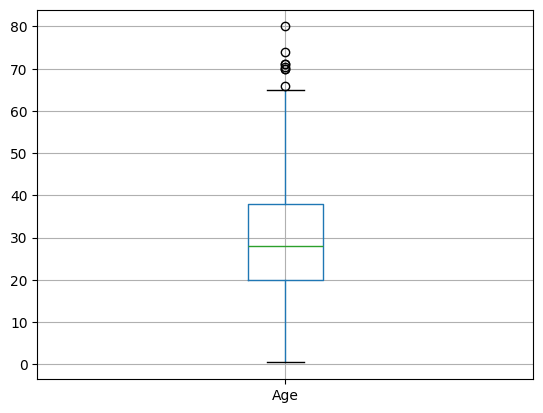

In [76]:
df.boxplot(column=['Age'])
plt.show()

## Age Cleaning

In [77]:
# there are two methods to get the quantiles of a column in a dataframe

q1_1 = np.quantile(df["Age"], 0.25)
q1_2 = df["Age"].quantile(0.25)

print(q1_1)
print(q1_2)

20.0
20.0


## IQR - Outlier Removal

In [78]:
# Outlier Detection:
# IQR = Q3 - Q1
# Lower Bound = Q1 - (1.5 * IQR)
# Upper Bound = Q3 + (1.5 * IQR)

q1 = np.quantile(df["Age"], 0.25)
q3 = np.quantile(df["Age"], 0.75)

iqr = q3 - q1
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)

print(f"Lower Bound: {lower}")
print(f"Upper Bound: {upper}")

Lower Bound: -7.0
Upper Bound: 65.0


In [79]:
df.shape

(889, 13)

In [80]:
# removing the ages below or over a certain threshold

df = df[(df["Age"] <= upper) & (df["Age"] >= lower)]
df.shape

(881, 13)

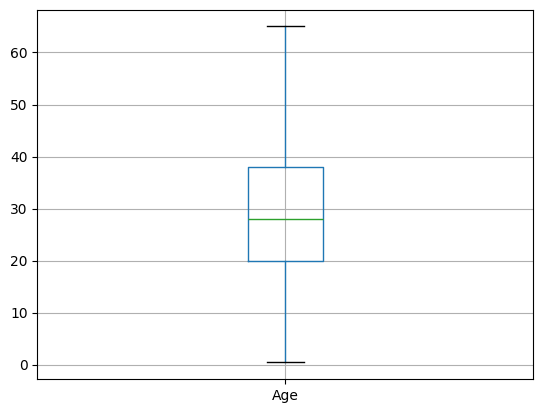

In [81]:
df.boxplot(column=['Age'])
plt.show()

## Getting Unique Values

In [38]:
# Similar to DISTINCT in SQL

df["Sex"].unique()

array(['male', 'female'], dtype=object)

## Clean Export

In [ ]:
df.to_csv("../data/processed/titanic-clean.csv", index=False)
df.to_pickle("../data/processed/titanic-clean.pickle")